# Simple Linear Regression - using Scikit Learn

By: Anuj Khandelwal (@anujonthemove)

In my previous notebooks I have implemented Simple Linear Regression using closed-form math solution and using gradient descent. This notebook is to demonstrate simple linear regression using Scikit Learn.

**Dataset: ** [Sweden Auto Insurance data](https://www.math.muni.cz/~kolacek/docs/frvs/M7222Q/data/AutoInsurSweden.txt)

**Task: ** Predict payment for auto insurance claims in Sweden. 

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Load data

In [2]:
data = pd.read_csv('../datasets/regression/univariate-regression/auto-insurance-data/auto-insurance-sweden.csv', sep=','
                 , names=['num_claims', 'total_payment'], skiprows=1)
print(data.head())

   num_claims  total_payment
0         108          392.5
1          19           46.2
2          13           15.7
3         124          422.2
4          40          119.4


## Rows and Columns

In [3]:
# rows and columns
rows, cols = data.shape
print("rows: {}".format(rows), "cols: {}".format(cols))

('rows: 63', 'cols: 2')


## Split data and convert to numpy arrays
Split the data into training data and target data.<br>
Converting dataframes to numpy arrays makes math operations easy.

In [4]:
X_df = data.iloc[:,0:1]
y_df = data.iloc[:,1:2]

# converting dataframe object to numpy arrays for optimized math operations
X = np.array(X_df)
y = np.array(y_df)

## Linear model evaluation
Using **k-fold cross validation** for model evaluation. "Cross-validation is a technique to evaluate predictive models by partitioning the original sample into a training set to train the model, and a test set to evaluate it." <br>
Source: [OpenML](https://www.openml.org/a/estimation-procedures/1)

In [5]:
# error metric
from sklearn.metrics import mean_squared_error
# cross-validation
from sklearn.model_selection import KFold
# import linear model
from sklearn import linear_model

# initialize k-fold cross-validation with 2 splits
kf = KFold(n_splits=2, shuffle=True)

# split input data 
kf.get_n_splits(X)

# create linear regression object
regr = linear_model.LinearRegression()

results = []
score = []

for train_index, test_index in kf.split(X):
    predictions = regr.fit(X[train_index], y[train_index]).predict(X[test_index])
    results.append(mean_squared_error(y[test_index], predictions))
    score.append(regr.score(X[test_index], y[test_index]))
    
print("Mean of MSE: {}".format(np.mean(results)))
print("Mean of variance score: {}".format(np.mean(score)))

Mean of MSE: 1256.26664364
Mean of variance score: 0.781815872834


## Fit model on the entire dataset

In [6]:
regr.fit(X, y)
print("Coefficients: {}".format(regr.coef_))
print("Intercept: {}".format(regr.intercept_))
coeff = np.array([(regr.intercept_).flatten(), (regr.coef_).flatten()])

Coefficients: [[3.41382356]]
Intercept: [19.99448576]


## Prediction

In [7]:
Test_x = np.array([31, 14, 53, 26, 100, 120, 95, 200])
Test_x = Test_x[:, np.newaxis]
predictions = regr.predict(Test_x)
# pd.DataFrame({'X_test': Test_x, 'y_pred': predictions})
print("predictions: \n {}".format(predictions))

predictions: 
 [[125.82301612]
 [ 67.7880156 ]
 [200.92713444]
 [108.75389832]
 [361.37684177]
 [429.65331297]
 [344.30772397]
 [702.75919777]]


## Regression Line

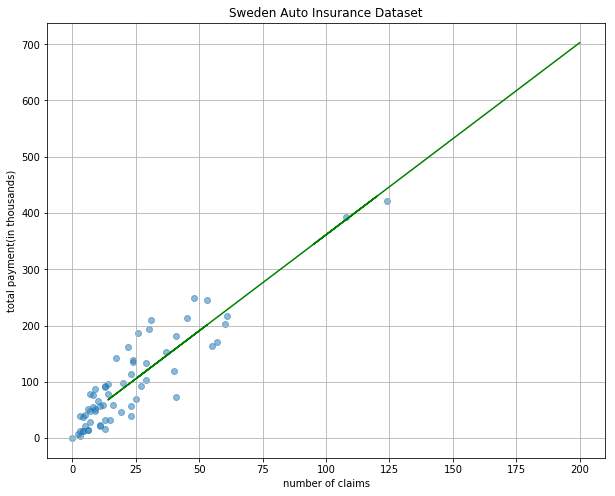

In [10]:
plt.figure(figsize=(10, 8))
plt.scatter(X, y, alpha=0.5)
plt.title('Sweden Auto Insurance Dataset')
plt.xlabel('number of claims')
plt.ylabel('total payment(in thousands)')
plt.grid()
plt.plot(Test_x, predictions, 'g');